# Modeling Exploration

### Imports

In [1]:
import pandas as pd
import numpy as np
import pickle


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics
np.random.seed(42)

In [2]:
df = pd.read_csv('../data/game_logs.csv')

In [3]:
df.head()

,Date,Home,Opp,R,H,HR,BA,OPS,Team,abbrev_name,...,K/BB,HR/9,WHIP,xFIP,HardHit%_P,wOBA,wRC+,OBP+,Barrel%,HardHit%
0,Apr 7,False,SDP,4,3,1,0.115,0.554,ARI,Y.Darvish,...,4.94,1.07,0.98,3.64,0.372,0.308,94,98,0.069,0.361
1,Apr 8,False,SDP,0,2,0,0.091,0.364,ARI,S.Manaea,...,3.09,1.68,1.36,3.93,0.424,0.308,94,98,0.069,0.361
2,Apr 9,False,SDP,2,5,1,0.116,0.426,ARI,J.Musgrove,...,4.62,1.19,1.09,3.50,0.327,0.308,94,98,0.069,0.361
3,Apr 10,False,SDP,5,5,2,0.129,0.516,ARI,N.Crismatt,...,2.82,0.57,1.20,3.52,0.363,0.308,94,98,0.069,0.361
4,Apr 12,False,HOU,1,4,1,0.130,0.518,ARI,L.Garcia,...,3.40,1.41,1.17,3.82,0.349,0.308,94,98,0.069,0.361


In [4]:
df.shape

(4462, 21)

### Setting up dataframes and train/test split

In [5]:
df['Home'] = df['Home'].astype(int)

In [6]:
X = df.drop(columns = ['Date', 'R', 'Team', 'abbrev_name', 'Opp'])
y = df['R']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
X.tail()

,Home,H,HR,BA,OPS,ERA,K/BB,HR/9,WHIP,xFIP,HardHit%_P,wOBA,wRC+,OBP+,Barrel%,HardHit%
4457,1,18,1,0.252,0.696,3.33,2.98,0.73,1.22,3.90,0.366,0.307,94,100,0.061,0.356
4458,1,10,1,0.252,0.697,4.09,3.11,0.89,1.28,4.28,0.341,0.307,94,100,0.061,0.356
4459,1,11,1,0.252,0.697,3.62,2.28,0.74,1.33,3.71,0.332,0.307,94,100,0.061,0.356
4460,1,11,1,0.252,0.697,2.84,2.65,0.95,1.08,3.50,0.322,0.307,94,100,0.061,0.356
4461,1,11,0,0.252,0.697,3.31,8.42,0.85,0.97,2.84,0.318,0.307,94,100,0.061,0.356


### Pipeline with standard scalar and different regression models to find best type of model

In [8]:
# Pipelines function to run models and output scores and mse
def pipe_model(model):
    pipe = Pipeline([
        ('ss', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {pipe.score(X_train, y_train)}')
    print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')
    return print('='*40)

In [9]:
pipe_model(LinearRegression())
pipe_model(KNeighborsRegressor())
pipe_model(DecisionTreeRegressor())
pipe_model(BaggingRegressor())
pipe_model(RandomForestRegressor())
pipe_model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.6903816526939168
Testing r2 score: 0.7086728000038126
Testing MSE: 2.943991205233757
KNeighborsRegressor()
Training r2 score: 0.6930198993168457
Testing r2 score: 0.5604626896409692
Testing MSE: 4.441720430107527
DecisionTreeRegressor()
Training r2 score: 1.0
Testing r2 score: 0.37895013844076786
Testing MSE: 6.275985663082437
BaggingRegressor()
Training r2 score: 0.9356273651492398
Testing r2 score: 0.652409813276584
Testing MSE: 3.5125537634408603
RandomForestRegressor()
Training r2 score: 0.953789288848109
Testing r2 score: 0.6905691774787761
Testing MSE: 3.1269363799283156
AdaBoostRegressor()
Training r2 score: 0.6311581886245208
Testing r2 score: 0.6194862533179641
Testing MSE: 3.84526101138898


Based on the above modeling, I will use Linear regression

### Baseline model MSE

In [10]:
metrics.mean_squared_error(y_test, pd.Series(y.mean(), index=range(len(y_test))))

10.110988081476888

## Lasso, Ridge, Elastic Net
----

Because I am using Linear Regression as my model of choice, it may prove fruitful to use lasso, ridge, or elastic net(Both) to help regularize.

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

alphas = np.logspace(0, 5, 100)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = alphas, cv = 5)
# Fit model using best ridge alpha!
ridge_cv.fit(X_train_sc, y_train)
print(ridge_cv.alpha_)
print(ridge_cv.best_score_)
print(ridge_cv.score(X_train_sc, y_train))
print(ridge_cv.score(X_test_sc, y_test))

23.101297000831593
0.6863669360061809
0.690339029118503
0.7085659406134966


In [12]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)
# Fit model using best ridge alpha!
lasso_cv.fit(X_train_sc, y_train)
print(lasso_cv.alpha_)
print(lasso_cv.score(X_train_sc, y_train))
print(lasso_cv.score(X_test_sc, y_test))

0.003511191734215131
0.6902916933352328
0.70839145351358


In [13]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio.
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train_sc, y_train)

# Evaluate model.
print(enet_model.score(X_train_sc, y_train))
print(enet_model.score(X_test_sc, y_test))

0.6375001372326098
0.6447521804691531


Linear regression is still performing the best, so we will move forward with that.

### Linear Regression Model
----

In [14]:
pipe = Pipeline([
        ('ss', StandardScaler()),
        ('lr', LinearRegression())
    ])
pipe.fit(X_train, y_train)
print(f'Training r2 score: {pipe.score(X_train, y_train)}')
print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')

Training r2 score: 0.6903816526939168
Testing r2 score: 0.7086728000038126
Testing MSE: 2.943991205233757


In [15]:
with open('../models/lr.pkl', 'wb') as f:
    pickle.dump(pipe, f)

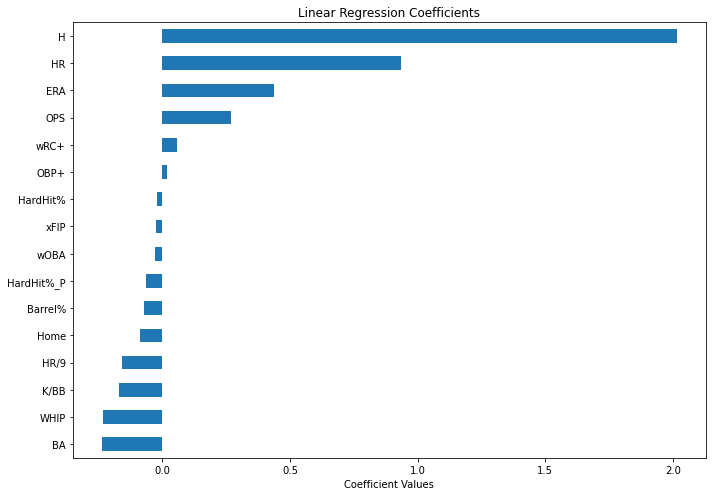

In [16]:
import matplotlib.pyplot as plt

coefs = pd.Series(pipe['lr'].coef_, index = X.columns.values).sort_values()

fig, ax = plt.subplots(figsize = (10,7))
coefs.plot.barh(ax=ax)
ax.set_title("Linear Regression Coefficients")
ax.set_xlabel("Coefficient Values")
fig.tight_layout()
plt.savefig('../images/lr_coef.png');